Predicted medals in 2028: 7.43
Predicted medals in 2032: 8.36
Predicted medals in 2036: 9.29


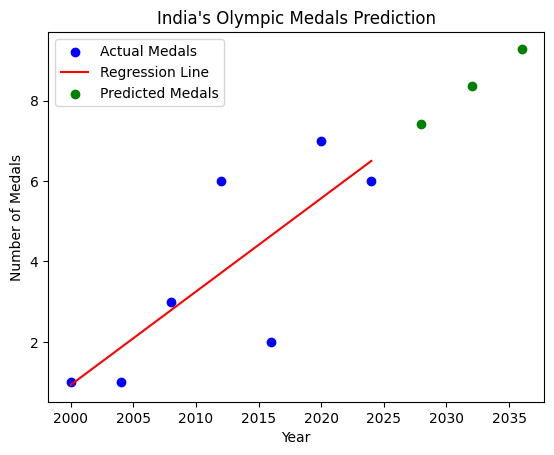

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Data: Years and corresponding total medals
data = {
    'Year': [2000, 2004, 2008, 2012, 2016, 2020, 2024],
    'Medals': [1, 1, 3, 6, 2, 7, 6]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Prepare the data for modeling
X = df['Year'].values.reshape(-1, 1)
y = df['Medals'].values

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict medals for the years 2025, 2026, and 2027
future_years = np.array([2028, 2032, 2036]).reshape(-1, 1)
predicted_medals = model.predict(future_years)

# Output the predictions
for year, medals in zip(future_years.flatten(), predicted_medals):
    print(f"Predicted medals in {year}: {medals:.2f}")

# Optional: Visualize the data and the regression line
plt.scatter(X, y, color='blue', label='Actual Medals')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.scatter(future_years, predicted_medals, color='green', label='Predicted Medals')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.title('India\'s Olympic Medals Prediction')
plt.legend()
plt.show()


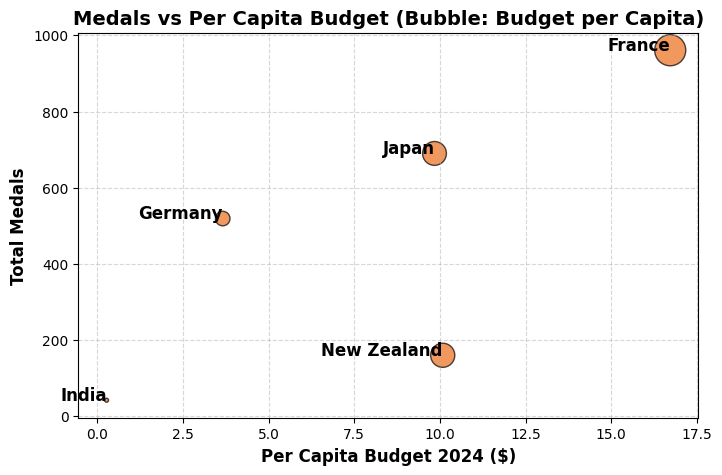

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data
countries = ["France", "India", "Japan", "New Zealand", "Germany"]
medals = [281 + 320 + 360, 10 + 10 + 22, 690, 160, 519]  # Total Medals
per_capita_budget = [16.72, 0.27, 9.84, 10.08, 3.66]  # Budget per capita in $

# Bubble size scaled by per capita budget
bubble_size = np.array(per_capita_budget) * 30  # Adjust size for better visibility

# Background color from table
bg_color = "#ffffff"
bar_color = "#eb6d1a"

# Create Bubble Chart
plt.figure(figsize=(8, 5), facecolor=bg_color)
# plt.gca().set_facecolor(bg_color)
plt.scatter(per_capita_budget, medals, s=bubble_size, alpha=0.7, c=bar_color, edgecolors="black")

# Labels and Title
for i, country in enumerate(countries):
    plt.text(per_capita_budget[i], medals[i], country, fontsize=12, ha='right', color='black', weight='bold')
plt.xlabel("Per Capita Budget 2024 ($)", fontsize=12, weight='bold', color='black')
plt.ylabel("Total Medals", fontsize=12, weight='bold', color='black')
plt.title("Medals vs Per Capita Budget (Bubble: Budget per Capita)", fontsize=14, weight='bold', color='black')
plt.grid(True, linestyle='--', alpha=0.5)

# Show Chart
plt.show()
